## DS-GA 1003, Machine Learning Spring 2023
### Lab 2: Gradient Descent and Adaptive Learning Rate


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from sklearn import preprocessing

## 1. Gradient Descent

From Lab 1 we know how to calculate and verify the gradients, let's code up a gradient decendent function.

For simplicity, let's assume that we are using a fixed learning rate and our termination condition is terminating at a fixed number of iterations.

In [3]:
def gradient_descent(f_theta, theta_0, lr=1e-3, n_iteration=1000):
    """
    Simple gradient descent optimization
    @param f_theta: a function that returns f(x) and its gradient
    @param theta_0: initial estimate
    @param lr: learning rate
    @param n_iteration: number of iterations
    """
    # create history dictionary for tracking progress per iteration.
    hist = {'theta': [], 'f_theta': []}
    
    # initialize theta_0
    theta_i =  theta_0
    
    # loop over iterations
    for i in range(n_iteration):
        # calculate the gradient
        f_val, f_grad = f_theta(theta_i)
        
        # save history
        hist['theta'].append(theta_i)
        hist['f_theta'].append(f_val)
        
        # update
        theta_i = theta_i - lr * f_grad
    return theta_i, hist

Let's test our implementation on a very simple example:

$$f(\theta) = \theta^2 - 2 \theta + 1$$

where $\theta \in \mathbb{R}$ is a real number.

We know that

$$\theta^* = \text{argmin}_{\theta} f(\theta) = 1$$

In [4]:
f_quad = lambda theta: (np.power(theta,2)-2*theta+1, 2*theta-2)
theta_init = np.random.randn()
theta_star, hist = gradient_descent(f_quad, theta_init, lr=1e-2) 
print("Initial theta = {0}, Optimal theta_star = {1}".format(theta_init,theta_star)) ## works well in this problm. 

Initial theta = 0.5662279805469704, Optimal theta_star = 0.9999999992699757


Let visualize how gradient descent decreases the function value at each iteration.

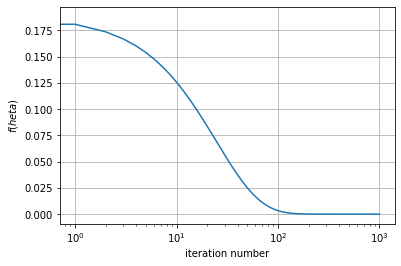

In [5]:
t = np.arange(1000)
plt.plot(t, hist['f_theta'])
plt.xlabel("iteration number")
plt.xscale('log')
plt.ylabel("$f( \theta )$")
plt.grid() 
## this is how our loss funciton goes down over itteratios

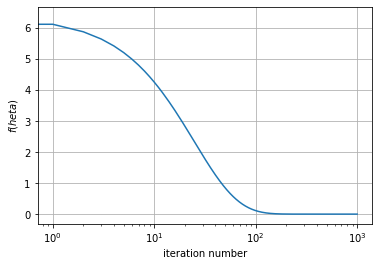

In [7]:
t = np.arange(1000)
plt.semilogx(t, hist['f_theta'])
plt.xlabel("iteration number")
plt.ylabel("$f( \theta )$")
plt.grid()

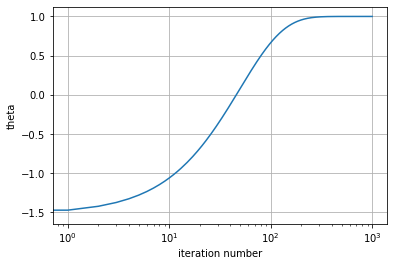

In [8]:
t = np.arange(1000)
plt.semilogx(t, hist['theta'])
plt.xlabel("iteration number")
plt.ylabel("theta")
plt.grid()

### 1.1 Impact of learning rate

In the previous example, we use a fixed learning rate through all iterations. The choice of learning rate has a very significant impact on the result. In the code block below, we run the optimization using 4 different learning rate.

lr = 1, theta* = 12, f(theta*) = 121
lr = 0.1, theta* = 0.9999999999999998, f(theta*) = 0.0
lr = 0.01, theta* = 0.99999998110955, f(theta*) = 3.3306690738754696e-16
lr = 0.001, theta* = -0.4886871211558325, f(theta*) = 2.2161893446952403
lr = 0.0001, theta* = -8.007659672808668, f(theta*) = 81.13793278114355


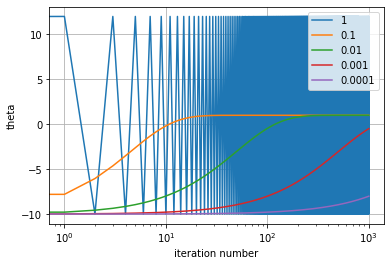

In [9]:
lr_list = [1, 0.1, 0.01, 0.001, 0.0001] ## multiple learning rates. 
theta_init = -10

for lr in lr_list:
    # run the optimizer
    theta_star, hist = gradient_descent(f_quad, theta_init, lr)   
    # plot the learning curve
    plt.semilogx(np.arange(1000), hist['theta'], label=str(lr))
    plt.xlabel("iteration number")
    plt.ylabel("theta")
    # report 
    print("lr = {0}, theta* = {1}, f(theta*) = {2}".format(lr, hist["theta"][-1], hist["f_theta"][-1]))
    
plt.grid()
plt.legend(loc='upper right')
plt.show()

## learning rate of 1 to high can not converge.
## learning rate of .1 converges fastest then .001, then .000001 
## so .1 is the best learning rate in that it covnerges most quickly 

From the plot above, we know that gradient descent gives us bad results if the learning rate is too large/small. Can we improve the result by letting the algorithm to adjust the learning rate during each iteration?

In [1]:
def gradient_descent_armijo(f_theta, theta_0, lr=1e-3, n_iteration=1000):
    """
    Simple gradient descent optimization with learning rate adjusted using Armijo's rule
    @param f_theta: a function that returns f(x) and its gradient
    @param theta_0: initial estimate
    @param lr: learning rate
    @param n_iteration: number of iterations
    """

    # idea of algo: ifthere is a large improvment we icnrease the leanring rate, if there is a small improbemnt we decfrase the learning rate. 


    # create history dictionary for tracking progress per iteration.
    hist = {'lr':[], 'theta': [], 'f_theta': []} 
    
    # initialize theta_0
    theta_i =  theta_0
    
    # loop over iterations
    for i in range(n_iteration):
        # calculate the gradient
        f_val, f_grad = f_theta(theta_i)
        
        # calculate the next theta with this gradient
        theta_i_plus_1 = theta_i - lr * f_grad
        f_val_next, _ = f_theta(theta_i_plus_1)
        
        # calculate the required improvement
        if isinstance(f_grad, np.ndarray):
            df_est = lr*f_grad.dot(f_grad)
        else:
            df_est = lr*f_grad*f_grad
        
        # if the improvement is significant, perform the update and increase learning rate
        if (f_val_next < f_val - 0.5*df_est):
            lr *= 2
            accept = True
        # if the improvement is insignificant, don't do the update and decrease learning rate
        else:
            lr /= 2 
            accept = False
        
        if accept:
            # do update
            theta_i = theta_i - lr * f_grad
            # save history
            hist['theta'].append(theta_i)
            hist['f_theta'].append(f_val)
            hist['lr'].append(lr)
    return theta_i, hist

Now let's see if the improved gradient descent can work for initial learning rate that are too large/small.

lr = 1, theta* = 1.0, f(theta*) = 121
lr = 0.1, theta* = 1.0000000081690243, f(theta*) = 2.220446049250313e-16
lr = 0.01, theta* = 1.0000000101838715, f(theta*) = 1.3322676295501878e-15
lr = 0.001, theta* = 1.0000000006143954, f(theta*) = 6.661338147750939e-16
lr = 0.0001, theta* = 0.9999999978166156, f(theta*) = 1.1102230246251565e-16


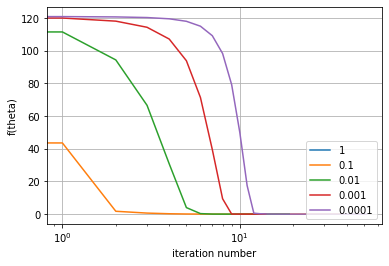

In [10]:
lr_list = [1, 0.1, 0.01, 0.001, 0.0001]
theta_init = -10

for lr in lr_list:
    # run the optimizer
    theta_star, hist = gradient_descent_armijo(f_quad, theta_init, lr)   
    # plot the learning curve
    plt.semilogx(np.arange(len(hist['f_theta'])), hist['f_theta'], label=str(lr))
    plt.xlabel("iteration number")
    plt.ylabel("f(theta)")
    # report 
    print("lr = {0}, theta* = {1}, f(theta*) = {2}".format(lr, hist["theta"][-1], hist["f_theta"][-1]))
    
plt.grid()
plt.legend(loc='lower right')
plt.show()

### Reference:

- DS-GA 1003 Machine Learning Spring 2021